## Notebook to explore the features of the dataset

Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Data location

In [3]:
solar_panel_data = '../data/solar_production.csv'

# open
with open(solar_panel_data) as csv_file:
    # open with pandas
    fields = ['time', 'value']
    solar_panel_df = pd.read_csv(csv_file, sep=',', usecols=fields)
    print(solar_panel_df.head())

# column names: 
# name,tags,time,calculation_mode_str,device_class_str,domain,entity_id,friendly_name,friendly_name_str,icon_str,integration_str,source_domain_str,source_entity_str,state_class_str,value
# timestamps: 
#   Friday 26 February 2021 16:34:30.880 - Friday 1 July 2022 18:31:03.327 (GMT)

                  time   value
0  1614357270880641024  126.94
1  1614357300880275968  120.16
2  1614357330890898944  115.41
3  1614357360889511168  116.68
4  1614357390889285120  123.69


Make test plot of some of the data

Sampling interval =  29998820096


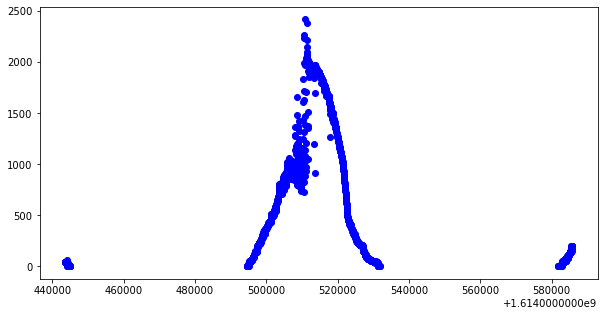

In [4]:
x = solar_panel_df['time']
y = solar_panel_df['value']

# convert to numpy
# convert nanoseconds --> seconds
x_np = np.array(x / 1e9, dtype=np.uint32)
y_np = np.array(y, dtype=np.float32)

print("Sampling interval = ", x[58] - x[57])

# pick samples 0 - 2000
x_plot = x_np[1200:2600]
y_plot = y_np[1200:2600]

# plot some range of the data
plt.figure(figsize=(10, 5))
plt.plot(x_plot, y_plot, 'bo')


Convert unix to datetime (seconds)

In [5]:
# convert x to unix seconds format
solar_panel_df.set_index('time', inplace=True)
solar_panel_df.index = pd.to_datetime(solar_panel_df.index, origin='unix')
solar_panel_df.index = solar_panel_df.index.round('s')
print(solar_panel_df.head())


                      value
time                       
2021-02-26 16:34:31  126.94
2021-02-26 16:35:01  120.16
2021-02-26 16:35:31  115.41
2021-02-26 16:36:01  116.68
2021-02-26 16:36:31  123.69


Resample to 30 second intervals

In [6]:
# resample to 30sec
sp_df_filled = solar_panel_df.resample('30S').bfill(limit=1)

# interpolate with limit=5
sp_df_interpolated = sp_df_filled.interpolate(limit=5, method='linear')

# zero fill the rest
sp_df_filled = sp_df_interpolated.fillna(0).clip(lower=0).round(1)

# save to txt
solar_panel_df.to_csv('../data/solar_panel_data_raw.txt', sep='\t')                 # raw   
sp_df_filled.to_csv('../data/solar_panel_data_filled.txt', sep='\t')                # zero filled and interpolated

Plot both raw and resampled

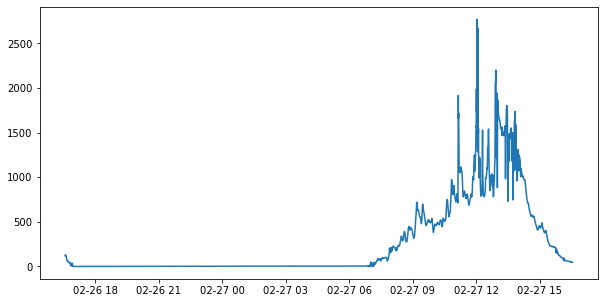

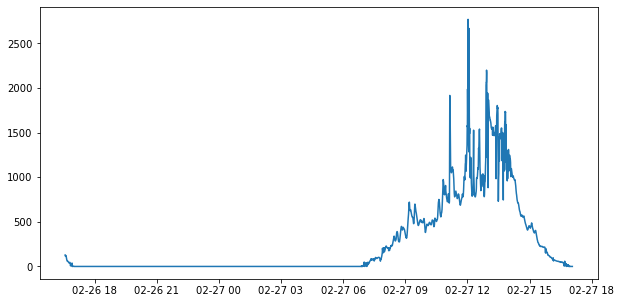

In [7]:
## raw
# pick samples 0 - 2000
start = 0
end = 2000

x = solar_panel_df.index[start:end]
y = solar_panel_df['value']

x_plot_raw = x[start:end-800]
y_plot_raw = y[start:end-800]

# plot some range of the data
plt.figure(figsize=(10, 5))
plt.plot(x_plot_raw, y_plot_raw)

## resampled
# pick samples 0 - 2000
end = end + 1000
x_plot_resampled = sp_df_filled.index[start:end-60]
y_plot_resampled = sp_df_filled['value'][start:end-60]

# plot some range of the data
plt.figure(figsize=(10, 5))
plt.plot(x_plot_resampled, y_plot_resampled)
